In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading prepared data

In [2]:
prepared_data = pd.read_csv(r"../Data/03_Prepared_data.csv")
prepared_data.head(5)

,Clump Thickness,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,2,1,3,1,1,0
1,5,4,5,7,10,3,2,1,0
2,3,1,1,2,2,3,1,1,0
3,6,8,1,3,4,3,7,1,0
4,4,1,3,2,1,3,1,1,0


## Splitting the data to X and y

In [3]:
y = prepared_data["Class"]
X = prepared_data.drop(["Class"], axis=1)
print(X.shape, y.shape)

(699, 8) (699,)


## Hyper parameter tuning and visualization

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [5]:
tuned_parameters = {"n_neighbors": range(1, 51)}
scores = ['precision', 'recall', 'accuracy', 'roc_auc']

results = pd.DataFrame(index=range(1,51))
for score in scores:
    clf = GridSearchCV(KNeighborsClassifier(), tuned_parameters, scoring=score, cv=5)
    clf.fit(X, y)
    results[score] = clf.cv_results_['mean_test_score']

In [6]:
from matplotlib import pyplot as plt

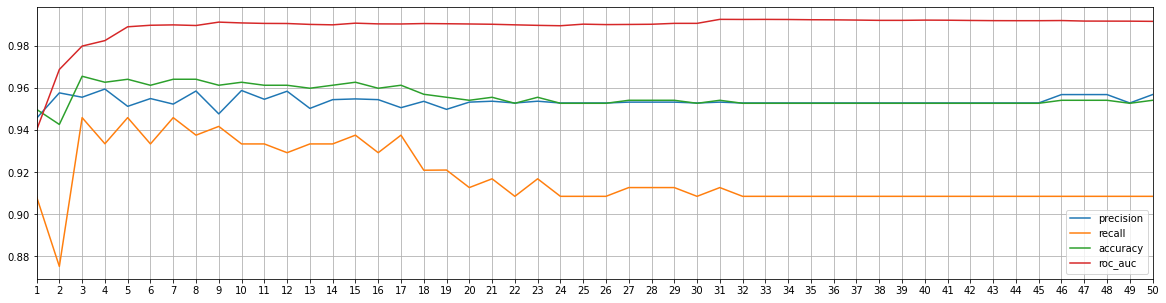

In [7]:
results.plot(xticks=range(1, 51), figsize=(20,5), grid=True, xlim=(1, 50))
plt.show()

### The optimal k according to graph is 5

## Final fit with best hyper parameter and testing with 20% of the data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((559, 8), (140, 8), (559,), (140,))

In [9]:
clf_final = KNeighborsClassifier(n_neighbors = 5)
clf_final.fit(X_train, y_train)

KNeighborsClassifier()

## Showing results

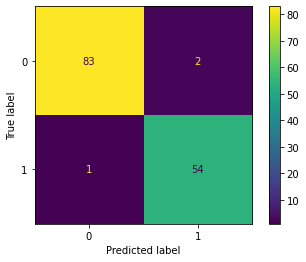

In [15]:
plot_confusion_matrix(clf_final, X_test, y_test) # , normalize="true"
plt.show()

In [11]:
print(classification_report(y_test, clf_final.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        85
           1       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



## Saving the model via pickle

In [12]:
# import pickle
# filename = r'../Trained models/KNN_trained.sav'
# pickle.dump(clf_final, open(filename, 'wb'))